In [43]:
import pandas as pd 

In [44]:
%pwd

'e:\\GAN for Face expression Classification\\final deployment'

In [45]:
import pandas as pd

# Load the first CSV file
face_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the second CSV file
voice_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\karti\AppData\Local\Temp\ipykernel_26408\4229893874.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  face_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\face_emotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\karti\AppData\Local\Temp\ipykernel_26408\4229893874.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  voice_emotions = pd.read_csv(r'E:\\GAN for Face expression Classification\\final deployment\\voiceemotions.csv').applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [46]:
print(face_emotions)

                    time face_emotion
0    2024-04-24 19:40:00          sad
1    2024-04-24 19:40:02          sad
2    2024-04-24 19:40:03          sad
3    2024-04-24 19:40:04          sad
4    2024-04-24 19:40:05          sad
..                   ...          ...
248  2024-04-24 19:44:49          sad
249  2024-04-24 19:44:49        happy
250  2024-04-24 19:44:52        happy
251  2024-04-24 19:44:53        happy
252  2024-04-24 19:44:55        happy

[253 rows x 2 columns]


In [47]:
print(voice_emotions)

                   time voice emotion
0   2024-04-24 19:40:07           sad
1   2024-04-24 19:40:16           sad
2   2024-04-24 19:40:25           sad
3   2024-04-24 19:40:33           sad
4   2024-04-24 19:40:42           sad
5   2024-04-24 19:40:51           sad
6   2024-04-24 19:40:59           sad
7   2024-04-24 19:41:08       disgust
8   2024-04-24 19:41:17           sad
9   2024-04-24 19:41:25           sad
10  2024-04-24 19:41:34           sad
11  2024-04-24 19:41:43           sad
12  2024-04-24 19:41:51           sad
13  2024-04-24 19:42:00           sad
14  2024-04-24 19:42:09       disgust
15  2024-04-24 19:42:17       disgust
16  2024-04-24 19:42:26           sad
17  2024-04-24 19:42:35           sad
18  2024-04-24 19:42:44       disgust
19  2024-04-24 19:42:52           sad
20  2024-04-24 19:43:01           sad
21  2024-04-24 19:43:10           sad
22  2024-04-24 19:43:18           sad
23  2024-04-24 19:43:27           sad
24  2024-04-24 19:43:36           sad
25  2024-04-

In [48]:
# Merge the DataFrames based on time
merged_df = pd.merge(face_emotions, voice_emotions, on='time', how='outer')

# Set 'time' column as index
merged_df.set_index('time', inplace=True)


# Display head of merged DataFrame
print("\nMerged DataFrame:")
print(merged_df)



Merged DataFrame:
                    face_emotion voice emotion
time                                          
2024-04-24 19:40:00          sad           NaN
2024-04-24 19:40:02          sad           NaN
2024-04-24 19:40:03          sad           NaN
2024-04-24 19:40:04          sad           NaN
2024-04-24 19:40:05          sad           NaN
...                          ...           ...
2024-04-24 19:45:37          NaN           sad
2024-04-24 19:45:46          NaN           sad
2024-04-24 19:45:54          NaN           sad
2024-04-24 19:46:03          NaN           sad
2024-04-24 19:46:12          NaN           sad

[277 rows x 2 columns]


In [49]:
# Fill NaN values with a placeholder, limit to one consecutive NaN value
merged_df_filled = merged_df.fillna(method='ffill', limit=1)

# Reset index
merged_df_filled.reset_index(inplace=True)

# Display head of merged DataFrame after filling NaNs
print("\nMerged DataFrame with limited consecutive NaNs:")
print(merged_df_filled)


Merged DataFrame with limited consecutive NaNs:
                    time face_emotion voice emotion
0    2024-04-24 19:40:00          sad           NaN
1    2024-04-24 19:40:02          sad           NaN
2    2024-04-24 19:40:03          sad           NaN
3    2024-04-24 19:40:04          sad           NaN
4    2024-04-24 19:40:05          sad           NaN
..                   ...          ...           ...
272  2024-04-24 19:45:37          NaN           sad
273  2024-04-24 19:45:46          NaN           sad
274  2024-04-24 19:45:54          NaN           sad
275  2024-04-24 19:46:03          NaN           sad
276  2024-04-24 19:46:12          NaN           sad

[277 rows x 3 columns]


C:\Users\karti\AppData\Local\Temp\ipykernel_26408\2794070047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_filled = merged_df.fillna(method='ffill', limit=1)


In [50]:
merged_df_filled.columns

Index(['time', 'face_emotion', 'voice emotion'], dtype='object')

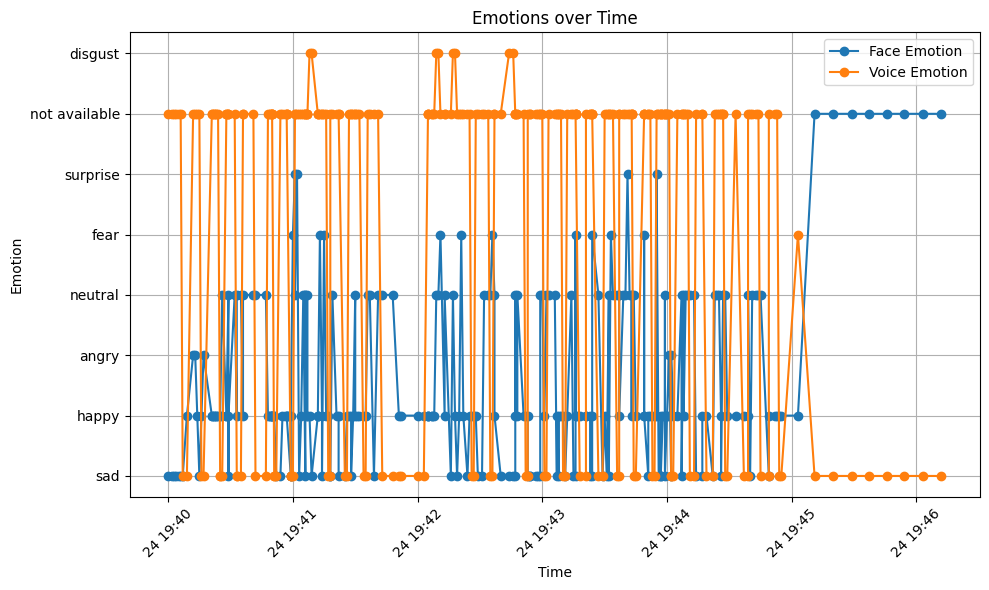

In [51]:
import matplotlib.pyplot as plt

# Convert 'time' column to datetime format
merged_df_filled['time'] = pd.to_datetime(merged_df_filled['time'])

# Set 'time' column as index
merged_df_filled.set_index('time', inplace=True)

# Fill NaN values with a placeholder
merged_df_filled = merged_df_filled.fillna('not available')

# Plot emotions over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['face_emotion'], label='Face Emotion', marker='o')
plt.plot(merged_df_filled.index, merged_df_filled['voice emotion'], label='Voice Emotion', marker='o')
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.title('Emotions over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
print(merged_df_filled)


                      face_emotion  voice emotion
time                                             
2024-04-24 19:40:00            sad  not available
2024-04-24 19:40:02            sad  not available
2024-04-24 19:40:03            sad  not available
2024-04-24 19:40:04            sad  not available
2024-04-24 19:40:05            sad  not available
...                            ...            ...
2024-04-24 19:45:37  not available            sad
2024-04-24 19:45:46  not available            sad
2024-04-24 19:45:54  not available            sad
2024-04-24 19:46:03  not available            sad
2024-04-24 19:46:12  not available            sad

[277 rows x 2 columns]


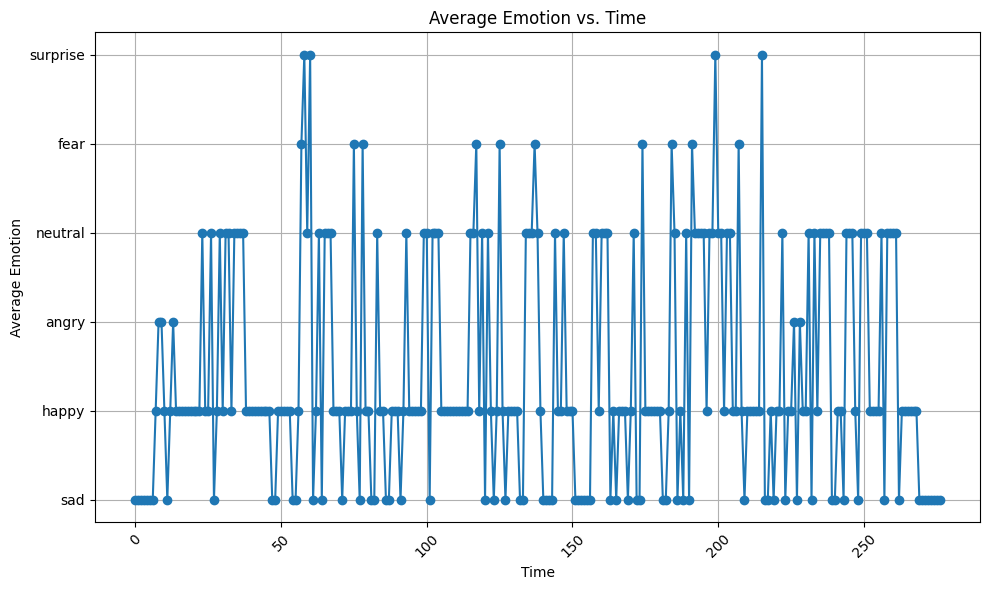

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to calculate average emotion
def calculate_average_emotion(row):
    face_emotion = row['face_emotion']
    voice_emotion = row['voice emotion']

    # If both face and voice emotions are NaN, return NaN
    if face_emotion == "not available" and voice_emotion == "not available":
        return "not available"

    # If face emotion is NaN or voice emotion is NaN, use the other value
    elif face_emotion == "not available":
        return voice_emotion

    elif voice_emotion == "not available":
        return face_emotion

    # If both face and voice emotions are available, use only face emotion
    else:
        return face_emotion

merged_df_filled.reset_index(inplace=True)
# Apply the function to calculate average emotion for each row
merged_df_filled['average_emotion'] = merged_df_filled.apply(calculate_average_emotion, axis=1)

# Plot emotion vs. time graph
plt.figure(figsize=(10, 6))
plt.plot(merged_df_filled.index, merged_df_filled['average_emotion'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Emotion')
plt.title('Average Emotion vs. Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
df = merged_df_filled

df

,time,face_emotion,voice emotion,average_emotion
0,2024-04-24 19:40:00,sad,not available,sad
1,2024-04-24 19:40:02,sad,not available,sad
2,2024-04-24 19:40:03,sad,not available,sad
3,2024-04-24 19:40:04,sad,not available,sad
4,2024-04-24 19:40:05,sad,not available,sad
...,...,...,...,...
272,2024-04-24 19:45:37,not available,sad,sad
273,2024-04-24 19:45:46,not available,sad,sad
274,2024-04-24 19:45:54,not available,sad,sad
275,2024-04-24 19:46:03,not available,sad,sad


In [55]:
import pandas as pd
from statistics import mode

# Calculate mode of the average_emotion column
mode_emotion = mode(df['average_emotion'])

print("Mode emotion:", mode_emotion)


Mode emotion: happy


In [56]:
import pandas as pd
from collections import Counter

# Calculate mode of the average_emotion column
mode_emotions = Counter(df['average_emotion']).most_common(7)

print("Top 7 emotions based on mode:")
for emotion, count in mode_emotions:
    print(emotion, ":", count)


Top 7 emotions based on mode:
happy : 122
sad : 69
neutral : 67
fear : 10
angry : 5
surprise : 4
